In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from IPython.display import display

In [1]:
%cd C:\Users\piecz\PycharmProjects\WdAD_projekt_wikipedia

C:\Users\piecz\PycharmProjects\WdAD_projekt_wikipedia


In [23]:
df = pd.read_csv("data//math_19_10_2025.csv",index_col =0)

display(df.head())

,title,word_count,num_links_internal,num_categories,categories,num_images,image_titles,num_edits,num_editors,summary,creation_date,mo_page_views,clicks_in,clicks_out,clicks_per_view
0,Mathematics,8041,500,23,['Category:All Wikipedia articles written in A...,10,"['File:Arithmetic symbols.svg', 'File:Bakhshal...",500,284,Mathematics is a field of study that discovers...,2001-11-08T15:31:38Z,160941,117924,54025,0.335682
1,−2,1178,500,11,"['Category:2 (number)', 'Category:Articles wit...",0,[],48,17,"In mathematics, negative two or minus two is a...",2025-08-22T04:03:57Z,4212,82,16,0.003799
2,Chang Thokpa,582,23,7,"['Category:Articles with short description', '...",4,['File:Classical Meitei odd numbers - related ...,9,3,The concept of Chang Thokpa (ꯆꯪ ꯊꯣꯛꯄ) is a cen...,2023-10-17T14:07:02Z,80,0,0,0.000000
3,Language of mathematics,797,83,6,['Category:All articles needing additional ref...,1,['File:Question book-new.svg'],307,169,The language of mathematics or mathematical la...,2003-11-20T14:31:23Z,3135,3967,540,0.172249
4,Limit group,1077,43,8,"['Category:Algebra', 'Category:Articles with s...",0,[],28,7,"In mathematics, specifically in group theory a...",2025-01-21T04:14:53Z,237,0,0,0.000000


### Preprocessing

In [73]:
df["creation_date_timestamp"] = pd.to_datetime(df.creation_date, utc=True).astype(int) //10**9
df["links_per_word"] = df.num_links_internal // df.word_count

cols_to_parse = ["categories","image_titles"]
for col in cols_to_parse:
    df[col] = df[col].apply(ast.literal_eval)

In [74]:
display(df.head())

,title,word_count,num_links_internal,num_categories,categories,num_images,image_titles,num_edits,num_editors,summary,...,clicks_out,clicks_per_view,creation_date_timestamp,links_per_word,word_count_log,mo_page_views_log,clicks_per_view_log,clicks_in_log,clicks_out_log,num_editors_log
0,Mathematics,8041,500,23,[Category:All Wikipedia articles written in Am...,10,"[File:Arithmetic symbols.svg, File:Bakhshali n...",500,284,Mathematics is a field of study that discovers...,...,54025,0.335682,1005233498,0.0,8.992433,11.988799,0.289442,11.677804,10.897221,5.652489
1,−2,1178,500,11,"[Category:2 (number), Category:Articles with s...",0,[],48,17,"In mathematics, negative two or minus two is a...",...,16,0.003799,1755835437,0.0,7.072422,8.345930,0.003791,4.418841,2.833213,2.890372
2,Chang Thokpa,582,23,7,"[Category:Articles with short description, Cat...",4,[File:Classical Meitei odd numbers - related t...,9,3,The concept of Chang Thokpa (ꯆꯪ ꯊꯣꯛꯄ) is a cen...,...,0,0.000000,1697551622,0.0,6.368187,4.394449,0.000000,0.000000,0.000000,1.386294
3,Language of mathematics,797,83,6,[Category:All articles needing additional refe...,1,[File:Question book-new.svg],307,169,The language of mathematics or mathematical la...,...,540,0.172249,1069338683,0.0,6.682109,8.050703,0.158924,8.286017,6.293419,5.135798
4,Limit group,1077,43,8,"[Category:Algebra, Category:Articles with shor...",0,[],28,7,"In mathematics, specifically in group theory a...",...,0,0.000000,1737432893,0.0,6.982863,5.472271,0.000000,0.000000,0.000000,2.079442


In [80]:
categories = list(set([item for sublist in df["categories"] for item in sublist]))
len(categories)


3243

In [81]:
df_ohe = df["categories"].explode().str.get_dummies().groupby(level=0).sum()

df = pd.concat([df, df_ohe], axis=1)

category_counts = df_ohe.sum().sort_values(ascending=False)

print("📊 Liczność wystąpień kategorii:")
print(category_counts)

print("\n🔢 Liczba kategorii:", len(category_counts))

📊 Liczność wystąpień kategorii:
Category:Articles with short description                 1099
Category:Short description is different from Wikidata     686
Category:Short description matches Wikidata               390
Category:All stub articles                                236
Category:Mathematics-related lists                        224
                                                         ... 
Category:William Rowan Hamilton                             1
Category:William Morrow and Company books                   1
Category:Willard Van Orman Quine                            1
Category:Wikipedia semi-protected pages                     1
Category:0 (number)                                         1
Length: 3243, dtype: int64

🔢 Liczba kategorii: 3243


13


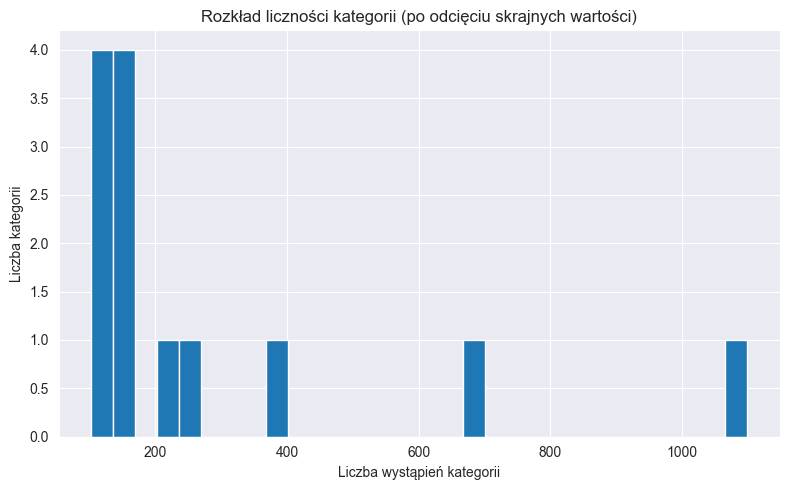

In [93]:
lower = np.percentile(category_counts, 5)
upper = np.percentile(category_counts,100)

filtered = category_counts[(category_counts >= 100) & (category_counts <= upper)]
print(len(filtered))

plt.figure(figsize=(8,5))
plt.hist(filtered, bins=30)
plt.title("Rozkład liczności kategorii (po odcięciu skrajnych wartości)")
plt.xlabel("Liczba wystąpień kategorii")
plt.ylabel("Liczba kategorii")
plt.tight_layout()
plt.show()

In [94]:
filtered = category_counts[category_counts >= 100]
df_ohe_filtered = df_ohe[filtered.index]

df = pd.concat([df.drop(columns=df_ohe.columns), df_ohe_filtered], axis=1)

In [99]:
for x in filtered.index:
    df[x] = df[x].astype(bool)

In [100]:
display(df)

,title,word_count,num_links_internal,num_categories,categories,num_images,image_titles,num_edits,num_editors,summary,...,Category:All stub articles,Category:Mathematics-related lists,Category:History of mathematics,Category:All articles needing additional references,Category:Mathematics stubs,Category:All articles with unsourced statements,Category:Webarchive template wayback links,Category:Applied mathematics,Category:Mathematical terminology,Category:Mathematical notation
0,Mathematics,8041,500,23,[Category:All Wikipedia articles written in Am...,10,"[File:Arithmetic symbols.svg, File:Bakhshali n...",500,284,Mathematics is a field of study that discovers...,...,False,False,False,False,False,False,True,False,False,False
1,−2,1178,500,11,"[Category:2 (number), Category:Articles with s...",0,[],48,17,"In mathematics, negative two or minus two is a...",...,False,False,False,False,False,False,True,False,False,False
2,Chang Thokpa,582,23,7,"[Category:Articles with short description, Cat...",4,[File:Classical Meitei odd numbers - related t...,9,3,The concept of Chang Thokpa (ꯆꯪ ꯊꯣꯛꯄ) is a cen...,...,False,False,False,False,False,False,False,False,False,False
3,Language of mathematics,797,83,6,[Category:All articles needing additional refe...,1,[File:Question book-new.svg],307,169,The language of mathematics or mathematical la...,...,False,False,False,True,False,False,False,False,False,False
4,Limit group,1077,43,8,"[Category:Algebra, Category:Articles with shor...",0,[],28,7,"In mathematics, specifically in group theory a...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,Weierstrass–Mandelbrot function,605,27,11,"[Category:All stub articles, Category:Articles...",4,[File:A terrain generated using the Weierstras...,41,4,The Weierstrass–Mandelbrot function (often abb...,...,True,False,False,False,True,False,False,False,False,False
1315,Weisner's method,153,21,6,[Category:All articles covered by WikiProject ...,2,"[File:E-to-the-i-pi.svg, File:Edit-clear.svg]",19,13,"In mathematics, Weisner's method is a method f...",...,True,False,False,False,True,False,False,False,False,False
1316,Weyl sequence,248,18,4,"[Category:All stub articles, Category:CS1 Germ...",1,[File:E-to-the-i-pi.svg],39,15,"In mathematics, a Weyl sequence is a sequence ...",...,True,False,False,False,True,False,False,False,False,False
1317,Whittaker–Henderson smoothing,707,25,6,"[Category:All stub articles, Category:Articles...",1,[File:E-to-the-i-pi.svg],28,7,Whittaker–Henderson smoothing or Whittaker–Hen...,...,True,False,False,False,True,False,False,False,False,False


### Visualization of data

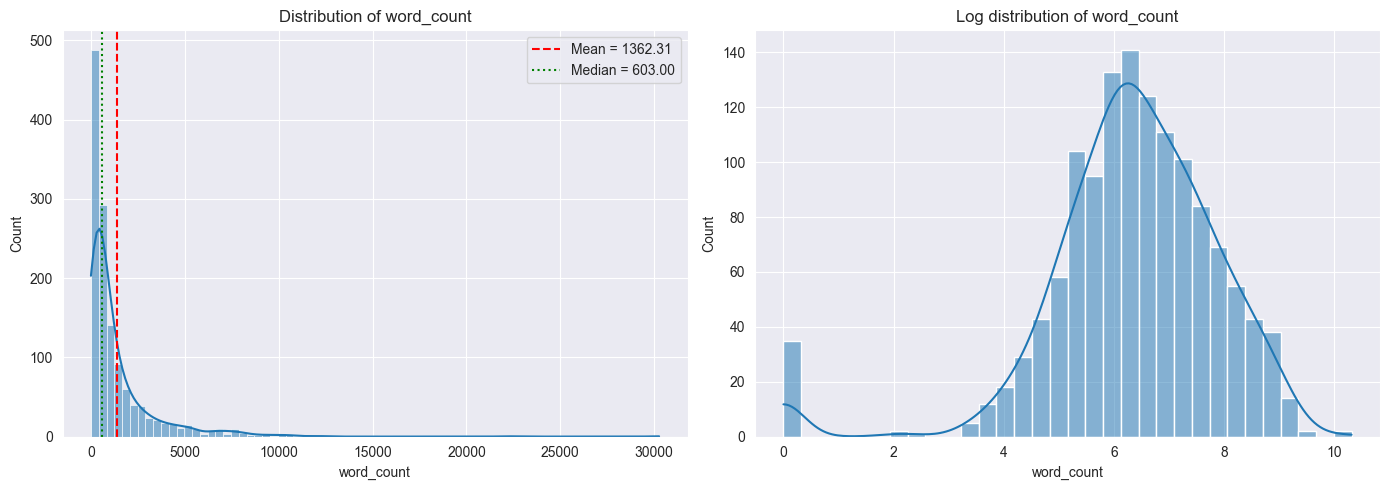

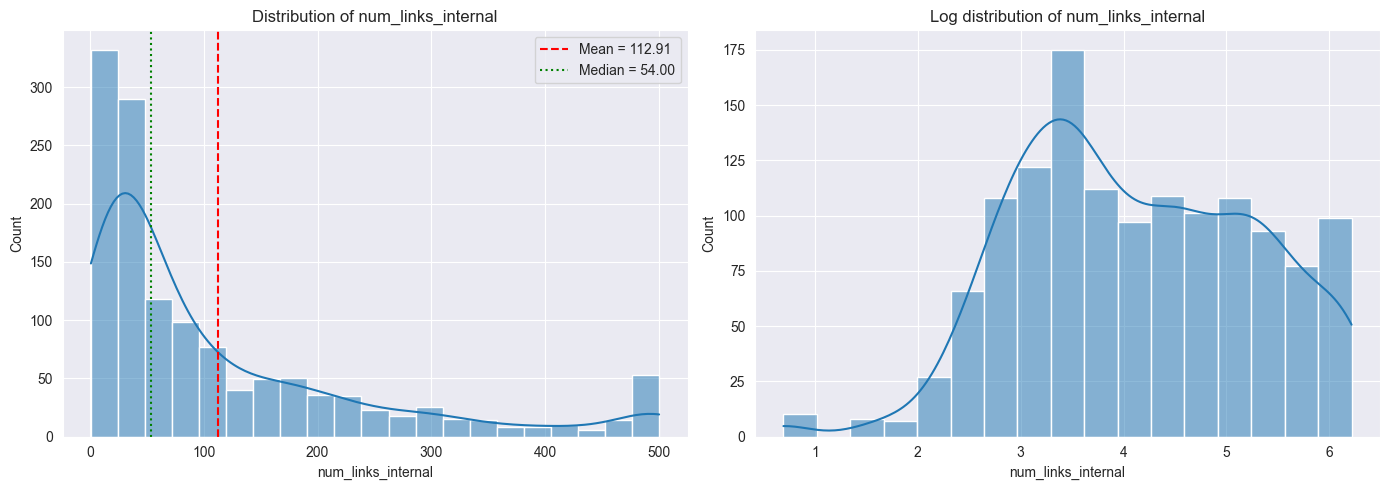

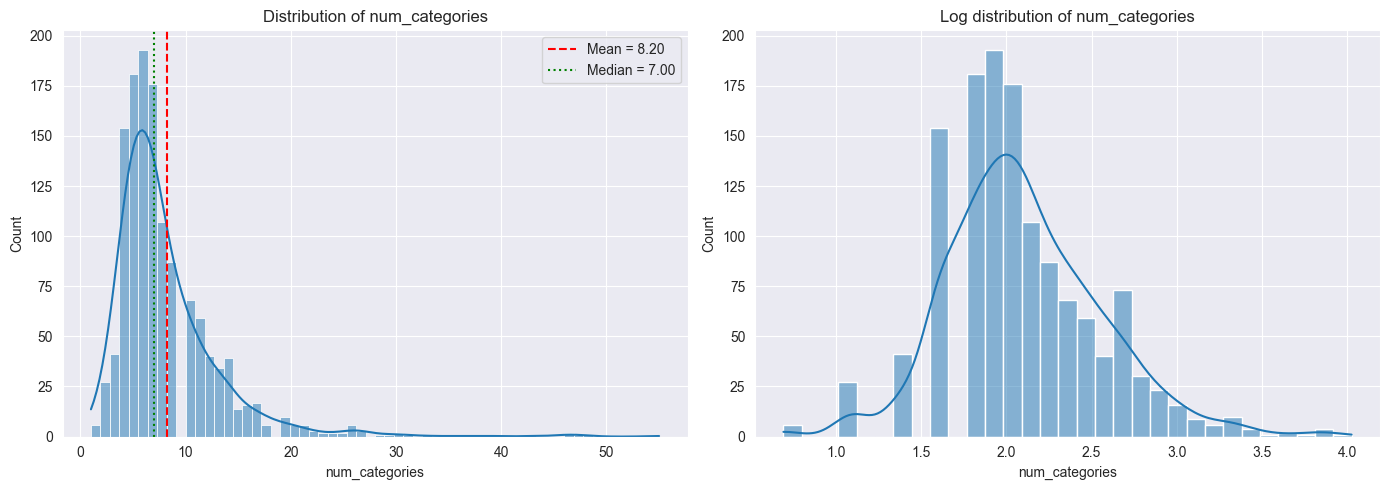

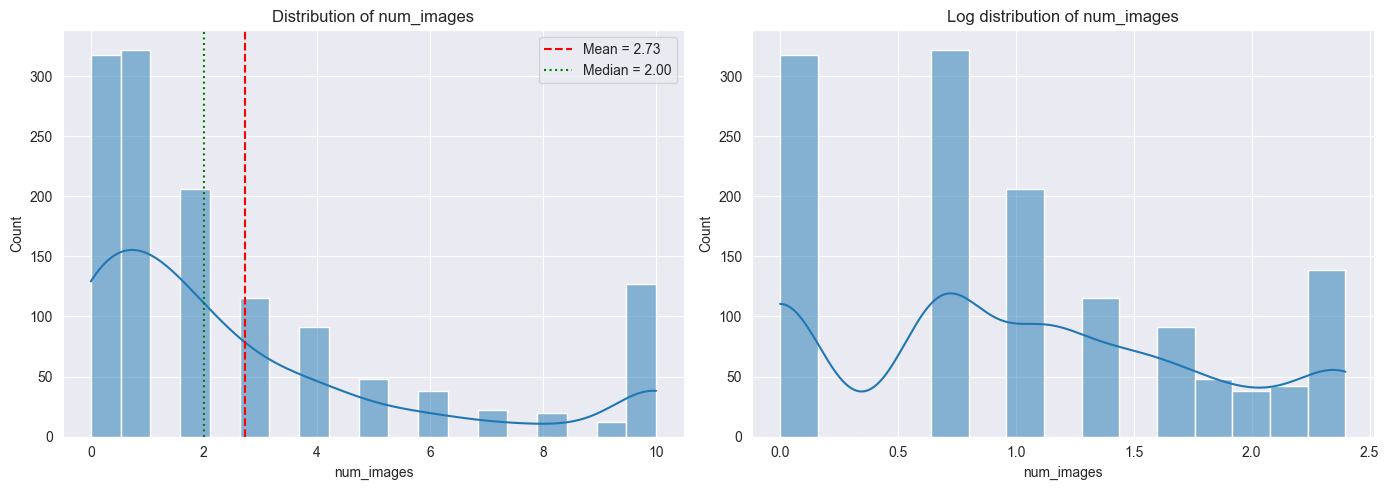

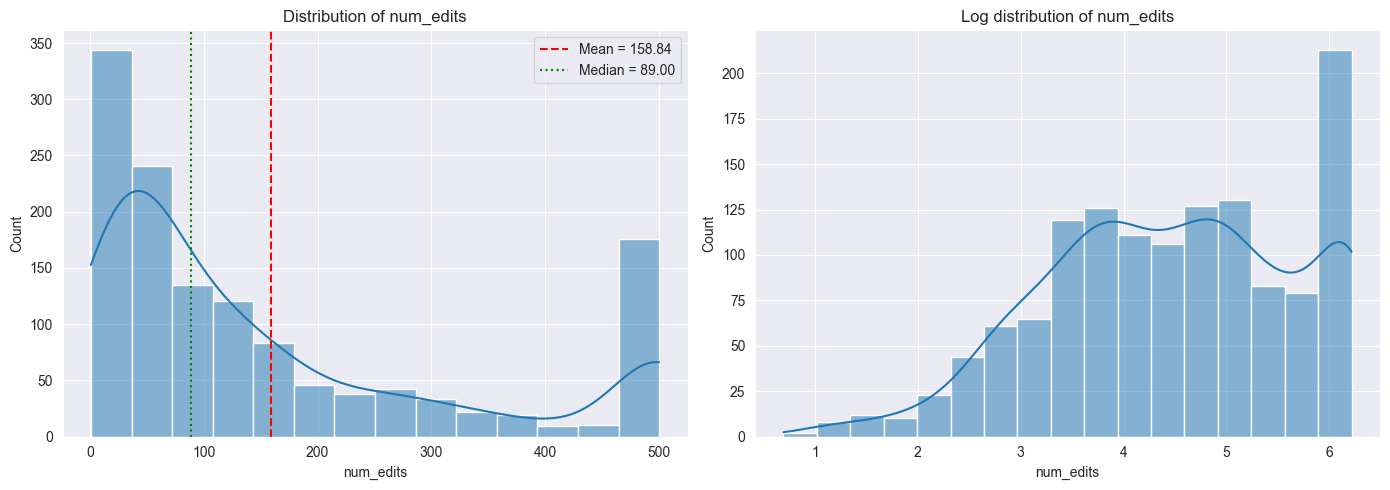

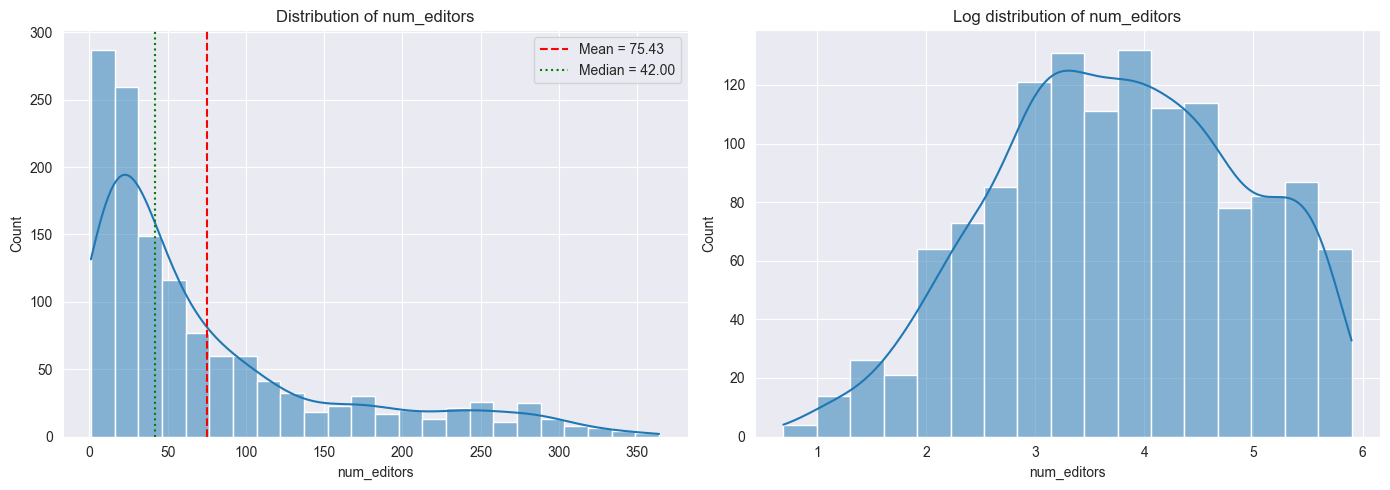

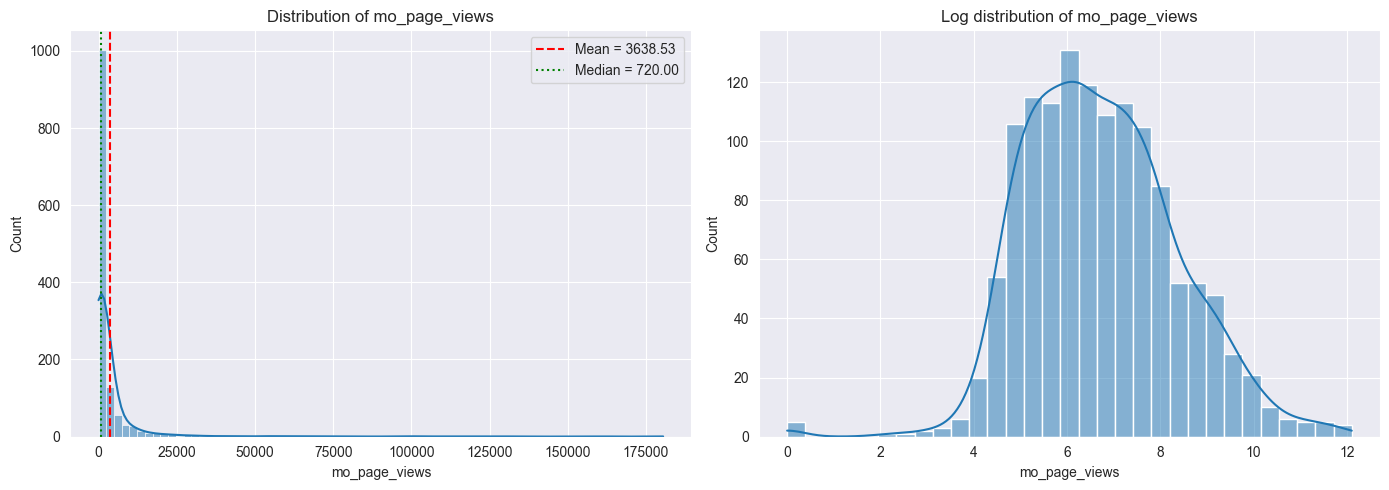

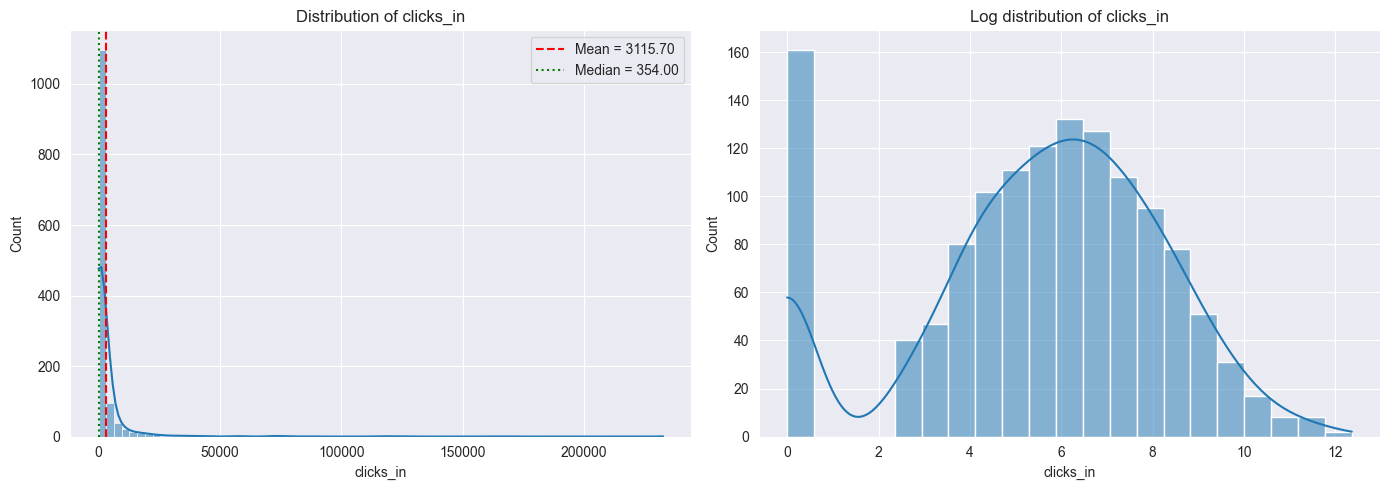

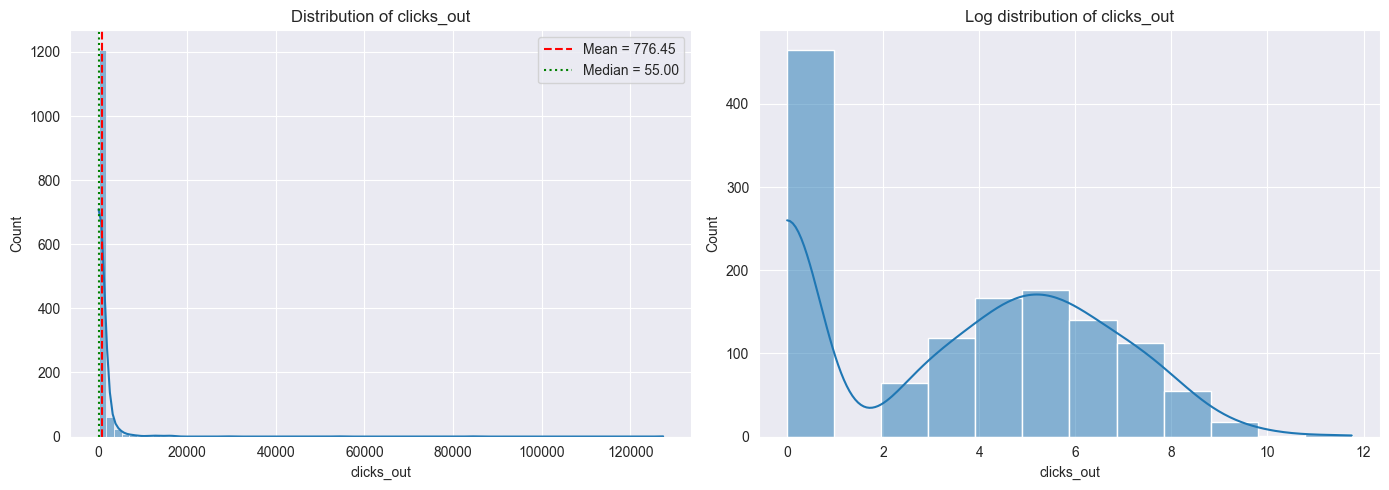

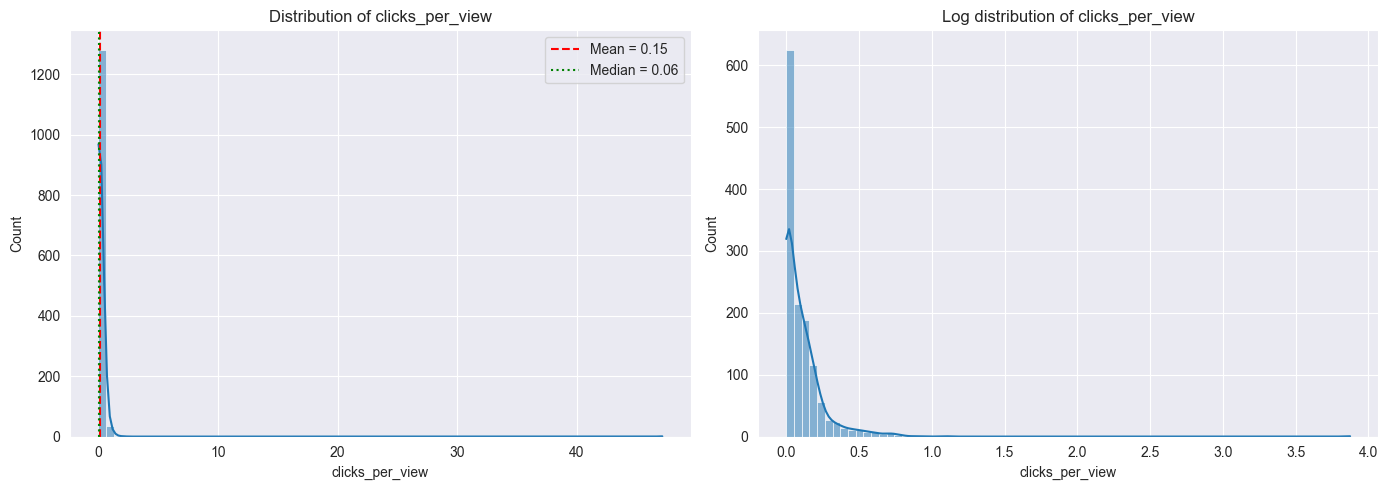

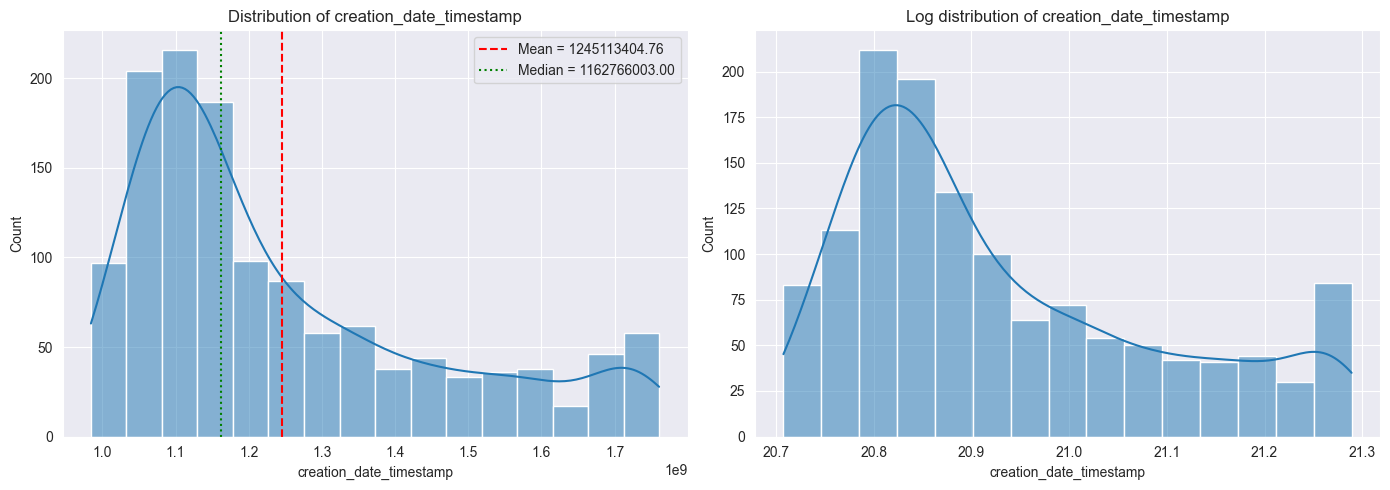

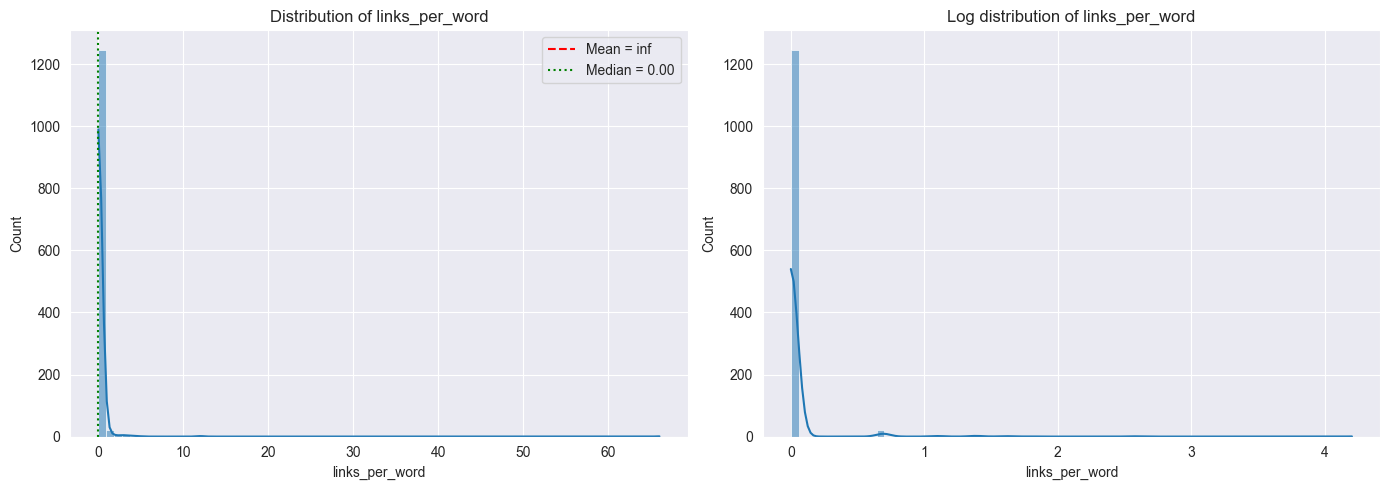

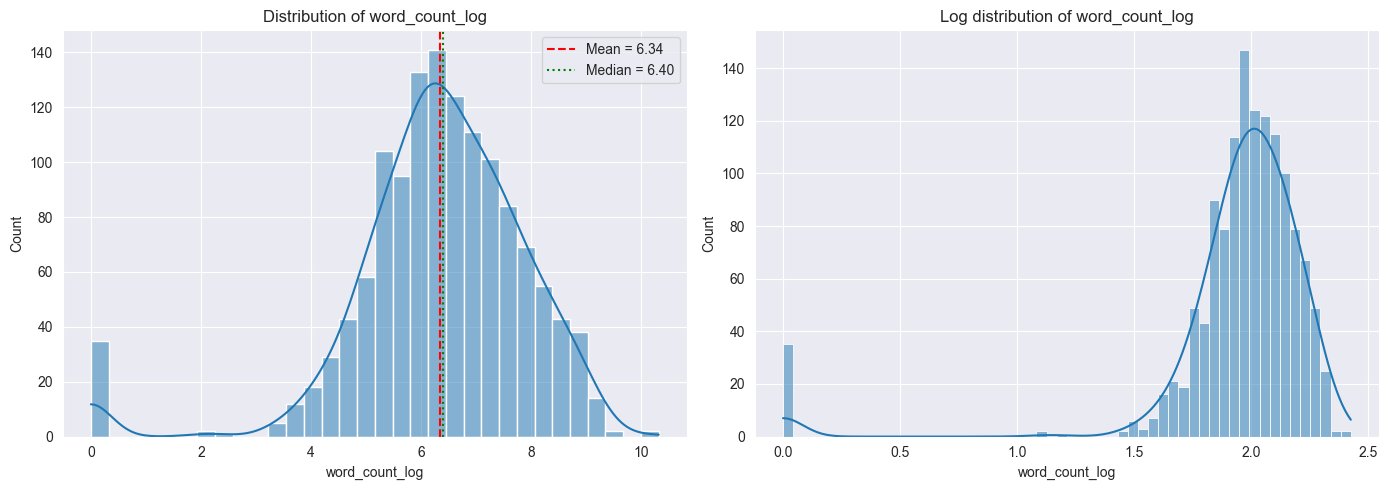

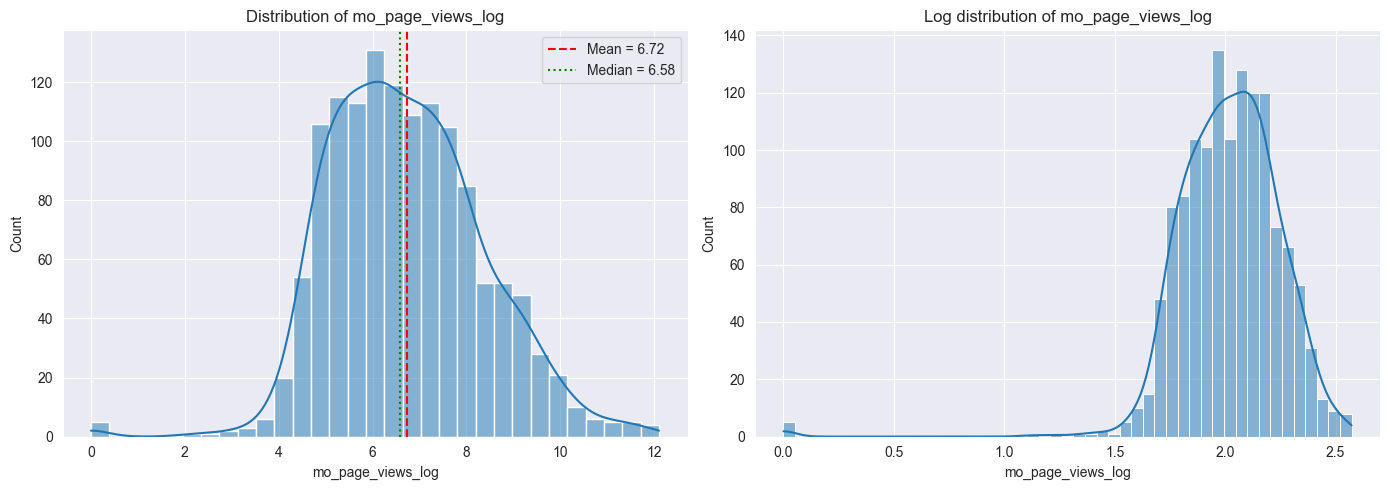

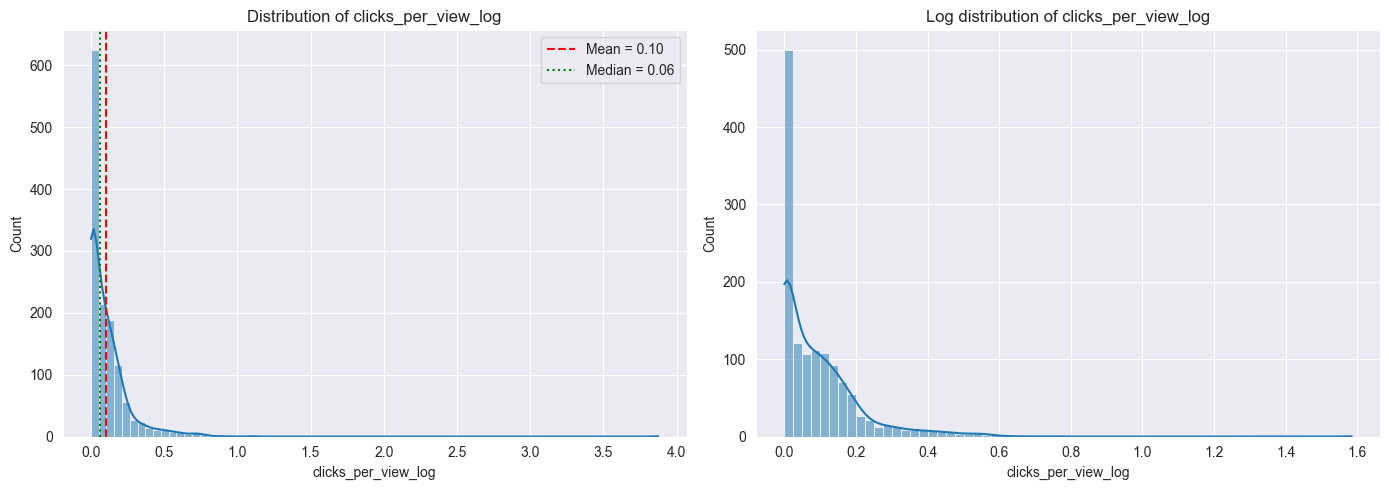

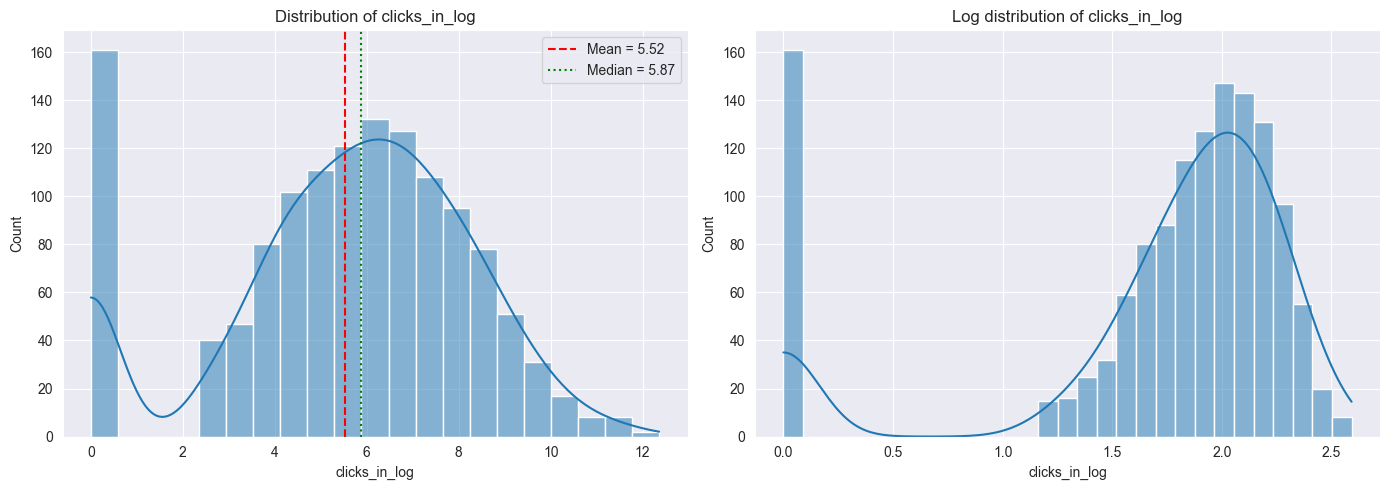

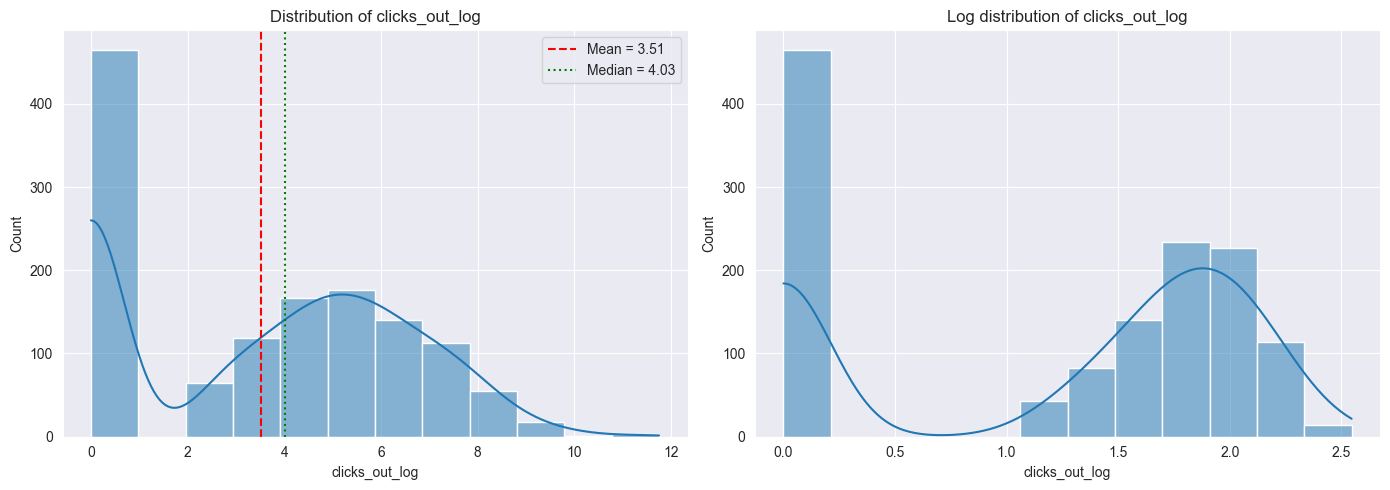

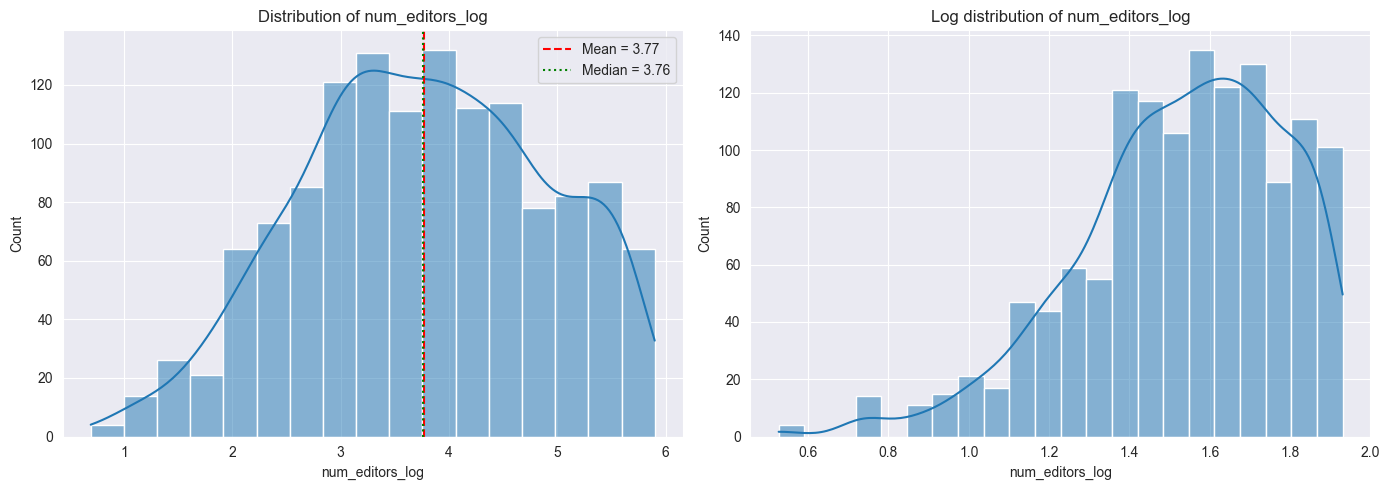

In [101]:
for col in df.select_dtypes(include=["number"]).columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[0].axvline(mean_val, color="red", linestyle="--", label=f"Mean = {mean_val:.2f}")
    axes[0].axvline(median_val, color="green", linestyle=":", label=f"Median = {median_val:.2f}")
    axes[0].legend()


    positive_values = df[df[col]+1 > 0][col]
    sns.histplot(np.log(positive_values+1), kde=True, ax=axes[1])
    axes[1].set_title(f"Log distribution of {col}")

    plt.tight_layout()
    plt.show()

In [102]:
to_log = ["word_count", "mo_page_views", "clicks_per_view", "clicks_in", "clicks_out", "num_editors"]

for x in to_log:
    df[x+"_log"] = np.log(df[x]+1)
display(df.head())

,title,word_count,num_links_internal,num_categories,categories,num_images,image_titles,num_edits,num_editors,summary,...,Category:All stub articles,Category:Mathematics-related lists,Category:History of mathematics,Category:All articles needing additional references,Category:Mathematics stubs,Category:All articles with unsourced statements,Category:Webarchive template wayback links,Category:Applied mathematics,Category:Mathematical terminology,Category:Mathematical notation
0,Mathematics,8041,500,23,[Category:All Wikipedia articles written in Am...,10,"[File:Arithmetic symbols.svg, File:Bakhshali n...",500,284,Mathematics is a field of study that discovers...,...,False,False,False,False,False,False,True,False,False,False
1,−2,1178,500,11,"[Category:2 (number), Category:Articles with s...",0,[],48,17,"In mathematics, negative two or minus two is a...",...,False,False,False,False,False,False,True,False,False,False
2,Chang Thokpa,582,23,7,"[Category:Articles with short description, Cat...",4,[File:Classical Meitei odd numbers - related t...,9,3,The concept of Chang Thokpa (ꯆꯪ ꯊꯣꯛꯄ) is a cen...,...,False,False,False,False,False,False,False,False,False,False
3,Language of mathematics,797,83,6,[Category:All articles needing additional refe...,1,[File:Question book-new.svg],307,169,The language of mathematics or mathematical la...,...,False,False,False,True,False,False,False,False,False,False
4,Limit group,1077,43,8,"[Category:Algebra, Category:Articles with shor...",0,[],28,7,"In mathematics, specifically in group theory a...",...,False,False,False,False,False,False,False,False,False,False


<Figure size 1000x800 with 0 Axes>

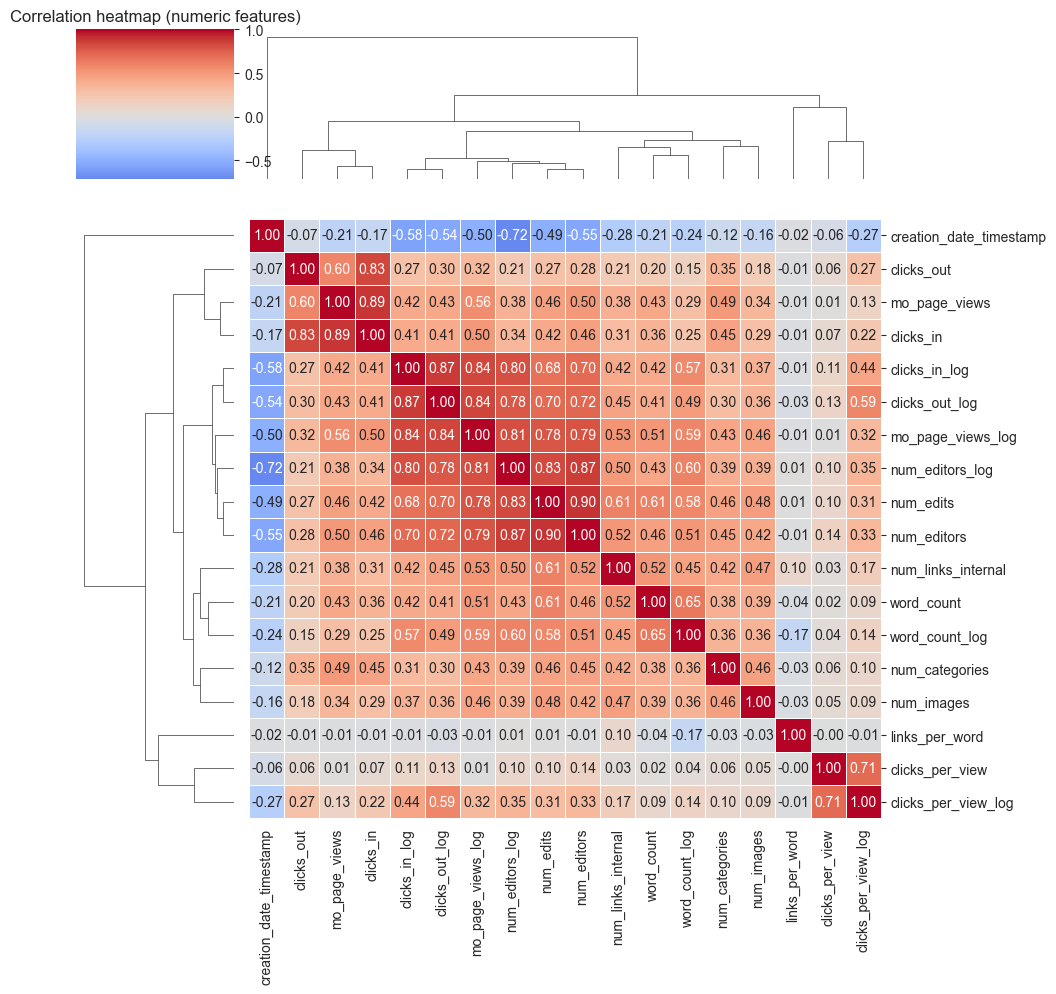

In [103]:
num_cols = df.select_dtypes(include=["number"]).columns

df_corr = df[num_cols].copy()
df_corr = df_corr.astype(float)

corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.clustermap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation heatmap (numeric features)")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

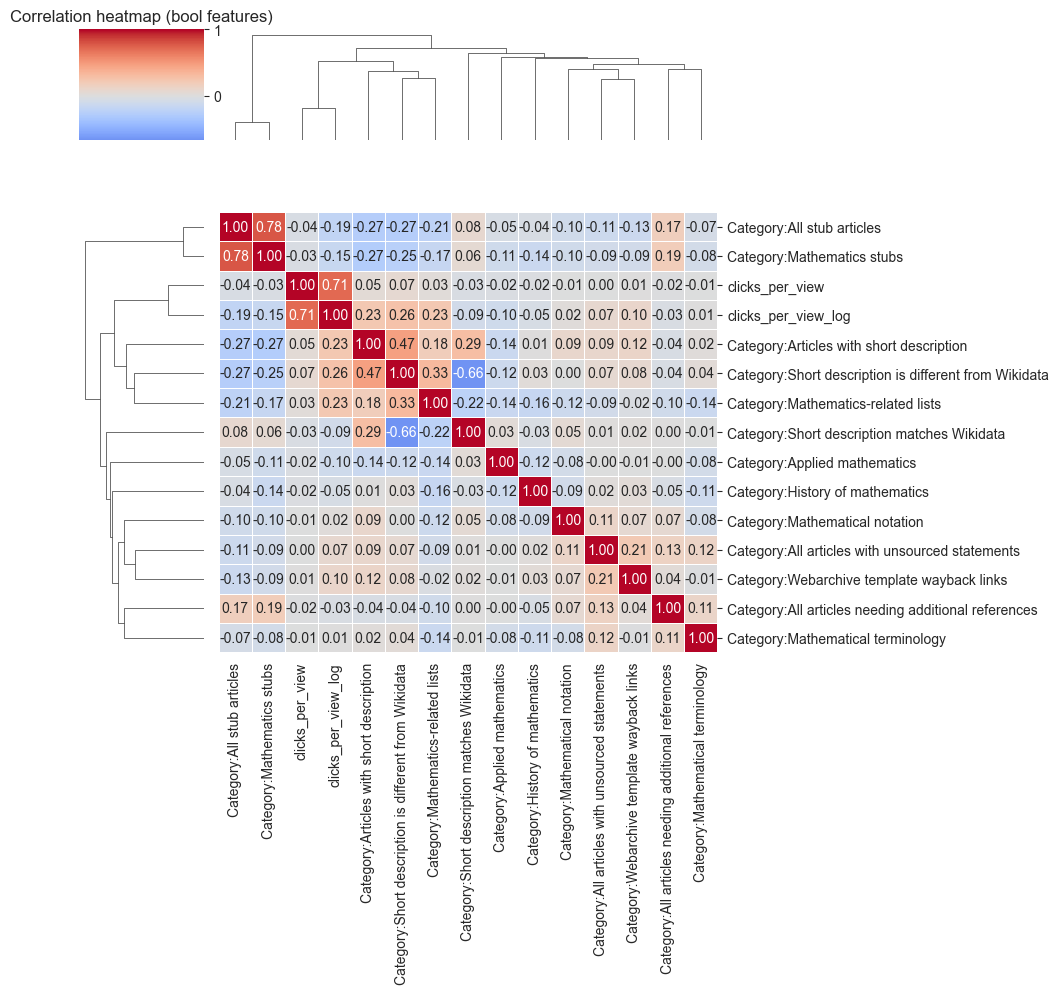

In [106]:
bool_cols = df.select_dtypes(include=["bool"]).columns.tolist()

df_corr = df[bool_cols+["clicks_per_view", "clicks_per_view_log"]].copy()
df_corr = df_corr.astype(float)

corr_bool = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.clustermap(
    corr_bool,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation heatmap (bool features)")
plt.tight_layout()
plt.show()

In [109]:
target = "clicks_per_view"

corr_target_main = corr[target].drop(
    [target] + [x for x in corr.columns if "clicks" in x or "views" in x],
    errors="ignore"
)

corr_target_bool = corr_bool[target].drop(
    [target],
    errors="ignore"
)

correlations = pd.concat([corr_target_main, corr_target_bool])

strong_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print("📊 Clicks per view — potential predictors:")
print(strong_corr.head(10))


📊 Clicks per view — potential predictors:
clicks_per_view_log                                      0.709801
num_editors                                              0.137803
num_editors_log                                          0.100328
num_edits                                                0.099019
Category:Short description is different from Wikidata    0.066222
creation_date_timestamp                                 -0.062563
num_categories                                           0.060578
num_images                                               0.054233
Category:Articles with short description                 0.046484
Category:All stub articles                              -0.041229
Name: clicks_per_view, dtype: float64


In [119]:
target = "clicks_per_view_log"

corr_target_main = corr[target].drop(
    [target] + [x for x in corr.columns if "clicks" in x or "views" in x],
    errors="ignore"
)

corr_target_bool = corr_bool[target].drop(
    ["clicks_per_view","clicks_per_view_log"],
    errors="ignore"
)

correlations = pd.concat([corr_target_main, corr_target_bool])

strong_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print("📊 Log clicks per view — potential predictors:")
print(strong_corr.head(10))

📊 Log clicks per view — potential predictors:
num_editors_log                                          0.353534
num_editors                                              0.330134
num_edits                                                0.308922
creation_date_timestamp                                 -0.265400
Category:Short description is different from Wikidata    0.264213
Category:Articles with short description                 0.227293
Category:Mathematics-related lists                       0.225245
Category:All stub articles                              -0.186494
num_links_internal                                       0.172788
Category:Mathematics stubs                              -0.149111
Name: clicks_per_view_log, dtype: float64


### Prediction - first try

In [120]:
print(target)
covariates = strong_corr[strong_corr.abs() >0.05].index.tolist()
covariates

clicks_per_view_log


['num_editors_log',
 'num_editors',
 'num_edits',
 'creation_date_timestamp',
 'Category:Short description is different from Wikidata',
 'Category:Articles with short description',
 'Category:Mathematics-related lists',
 'Category:All stub articles',
 'num_links_internal',
 'Category:Mathematics stubs',
 'word_count_log',
 'Category:Applied mathematics',
 'Category:Webarchive template wayback links',
 'num_categories',
 'Category:Short description matches Wikidata',
 'word_count',
 'num_images',
 'Category:All articles with unsourced statements',
 'Category:History of mathematics']

<Figure size 2000x1600 with 0 Axes>

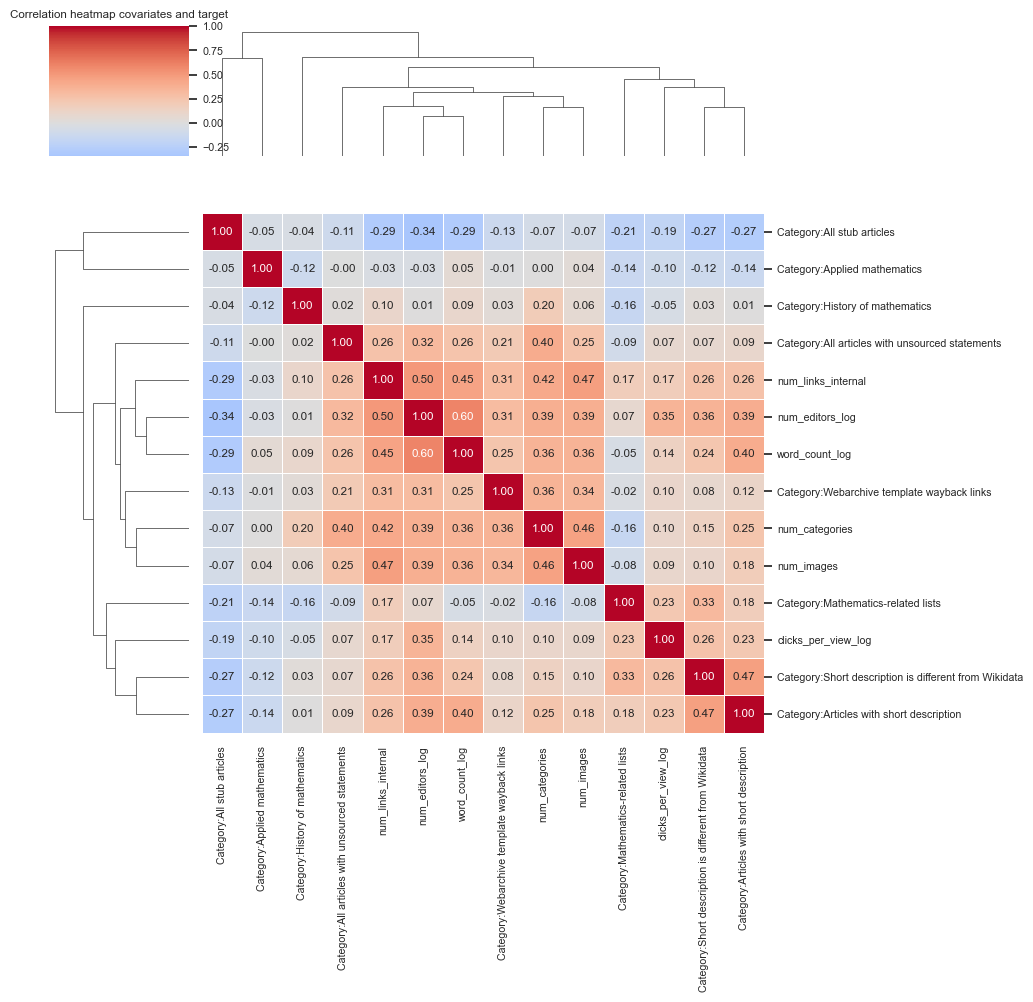

In [129]:
df_corr_cov = df[covariates+[target]].copy()

corr_cov = df_corr_cov.corr()

plt.figure(figsize=(20, 16))
sns.set(font_scale=0.7)
sns.clustermap(
    corr_cov,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation heatmap covariates and target")
plt.tight_layout()
plt.show()

In [128]:
to_drop = ["num_editors", "num_edits", "creation_date_timestamp", "word_count", 'Category:Mathematics stubs', 'Category:Short description matches Wikidata']
covariates = [x for x in covariates if x not in to_drop]

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(target)
print(covariates)

X = df[covariates]
y = df[target]

df_model = pd.concat([X, y], axis=1).dropna().copy()
X = df_model[covariates]
y = df_model[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state =1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

clicks_per_view_log
['num_editors_log', 'Category:Short description is different from Wikidata', 'Category:Articles with short description', 'Category:Mathematics-related lists', 'Category:All stub articles', 'num_links_internal', 'word_count_log', 'Category:Applied mathematics', 'Category:Webarchive template wayback links', 'num_categories', 'num_images', 'Category:All articles with unsourced statements', 'Category:History of mathematics']
Mean Squared Error: 0.0160
R^2 Score: 0.2759


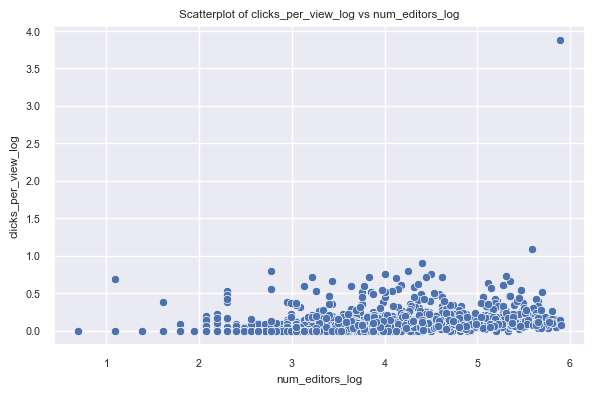

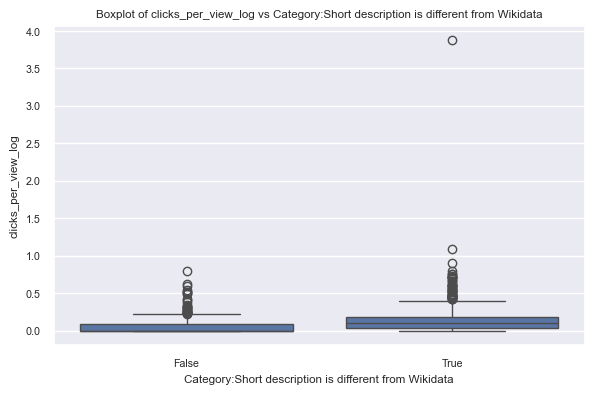

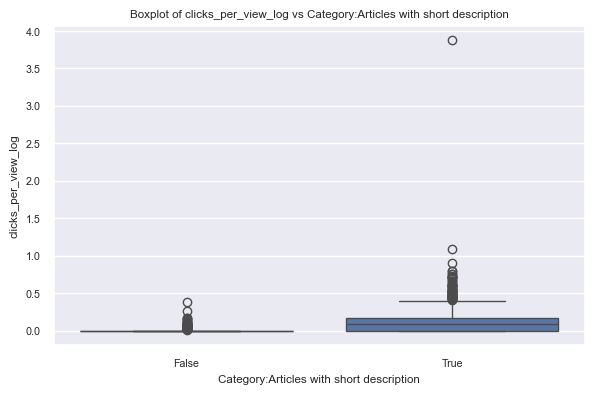

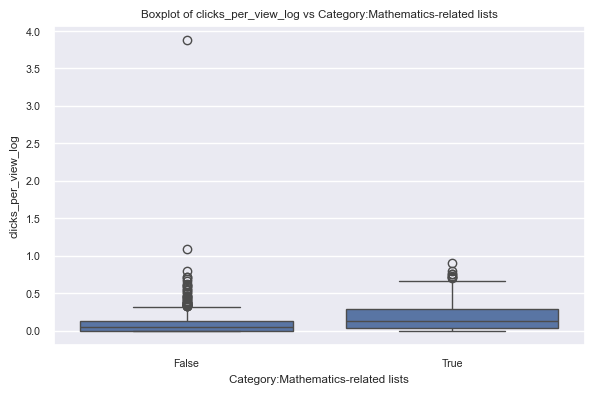

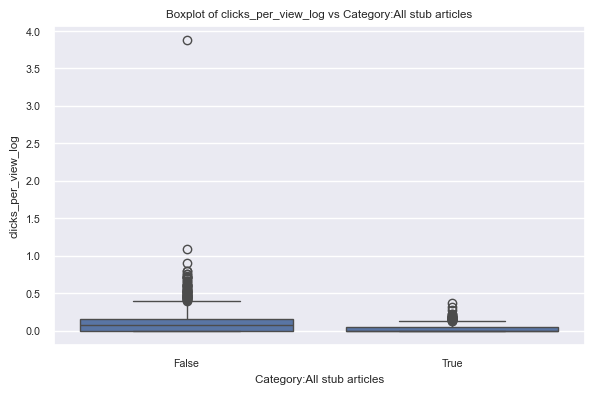

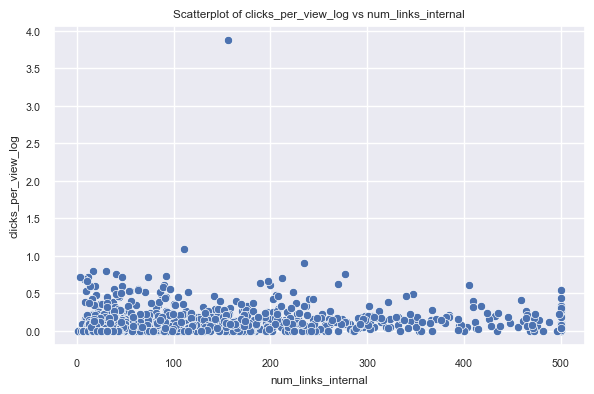

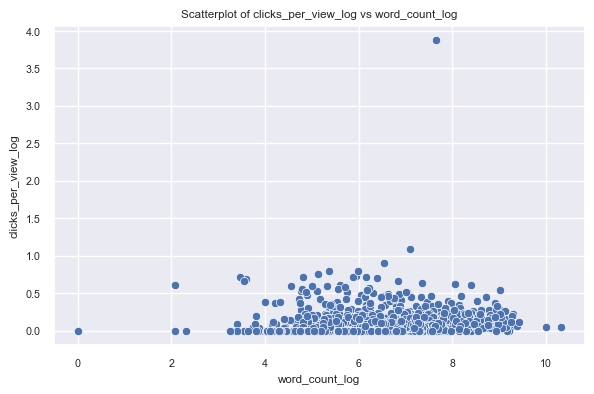

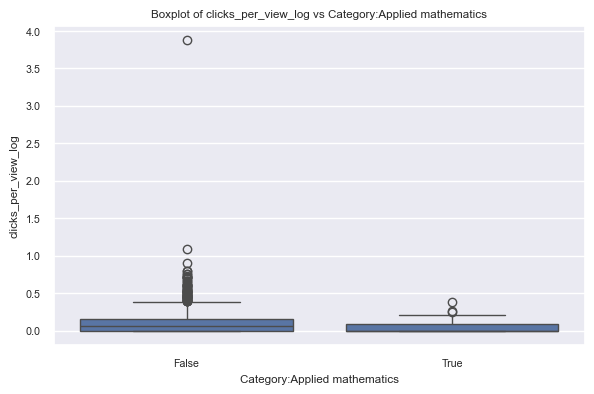

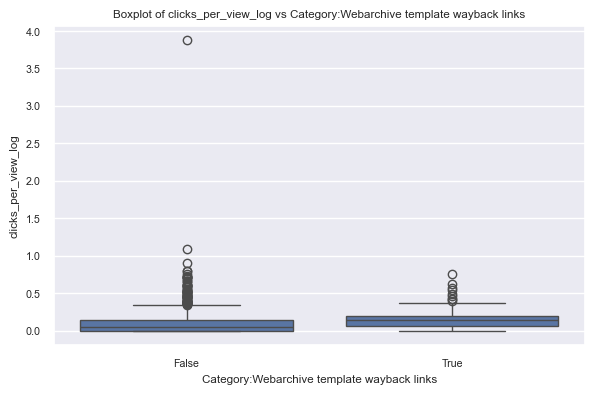

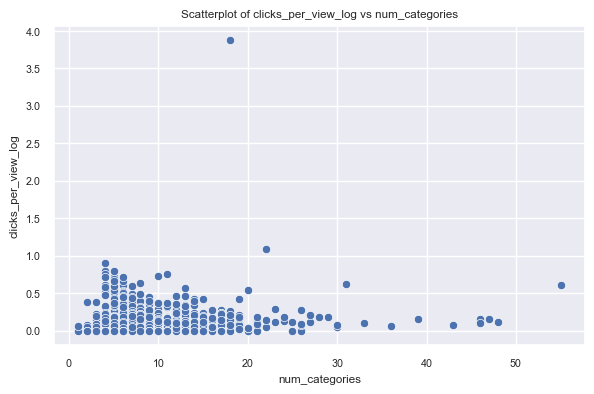

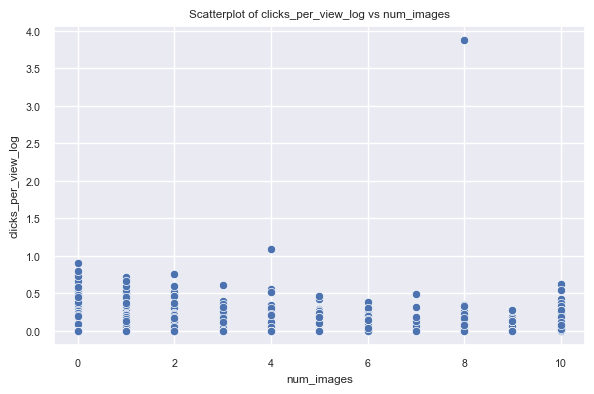

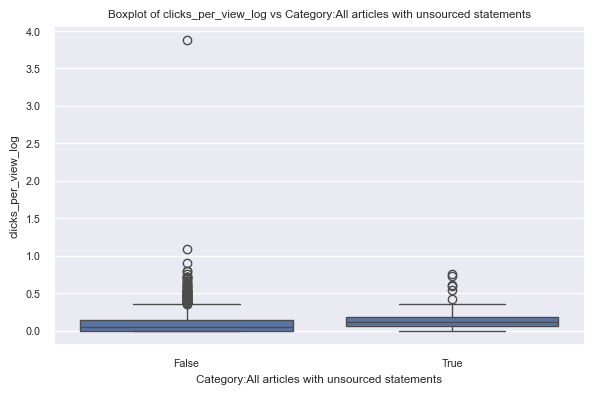

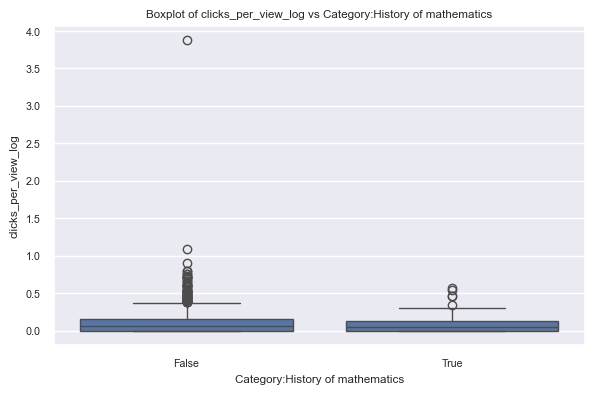

In [132]:
for col in covariates:
    plt.figure(figsize=(6,4))
    
    if df[col].dtype == "bool" or set(df[col].dropna().unique()).issubset({0,1}):
        sns.boxplot(x=df[col], y=df[target])
        plt.title(f"Boxplot of {target} vs {col}")
        plt.xlabel(col)
        plt.ylabel(target)
        
    if np.issubdtype(df[col].dtype, np.number):
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"Scatterplot of {target} vs {col}")
        plt.xlabel(col)
        plt.ylabel(target)
        
    
    plt.tight_layout()
    plt.show()

In [134]:
df[df.clicks_per_view_log>3]

,title,word_count,num_links_internal,num_categories,categories,num_images,image_titles,num_edits,num_editors,summary,...,Category:All stub articles,Category:Mathematics-related lists,Category:History of mathematics,Category:All articles needing additional references,Category:Mathematics stubs,Category:All articles with unsourced statements,Category:Webarchive template wayback links,Category:Applied mathematics,Category:Mathematical terminology,Category:Mathematical notation
960,2 + 2 = 5,2099,156,18,"[Category:1949 quotations, Category:Addition, ...",8,[File:2plus2havanagrafiti-IMG 20191212 1232347...,500,361,2 + 2 = 5 or two plus two equals five is a mat...,...,False,False,False,False,False,False,False,False,False,False


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

print("Target:", target)
print("Covariates:", covariates)

X = df[covariates]
y = df[target]

df_model = pd.concat([X, y], axis=1).dropna().copy()
X = df_model[covariates]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = DecisionTreeRegressor(random_state=1, max_depth=3)  # max_depth ogranicza przeuczenie
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Target: clicks_per_view_log
Covariates: ['num_editors_log', 'Category:Short description is different from Wikidata', 'Category:Articles with short description', 'Category:Mathematics-related lists', 'Category:All stub articles', 'num_links_internal', 'word_count_log', 'Category:Applied mathematics', 'Category:Webarchive template wayback links', 'num_categories', 'num_images', 'Category:All articles with unsourced statements', 'Category:History of mathematics']
Mean Squared Error: 0.0158
R^2 Score: 0.2820
